In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)
#figure,axes = plt.subplots(figsize = (12, 7))
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('blackFriday_train.csv')
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df_test = pd.read_csv('blackFriday_test.csv')
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
df = pd.concat([df_train,df_test])
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [5]:
df.describe().round(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.00,783667.00,783667.00,783667.00,537685.00,237858.00,550068.00
mean,1003029.00,8.08,0.41,5.37,9.84,12.67,9263.97
std,1727.27,6.52,0.49,3.88,5.09,4.13,5023.07
min,1000001.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1001519.00,2.00,0.00,1.00,5.00,9.00,5823.00
50%,1003075.00,7.00,0.00,5.00,9.00,14.00,8047.00
75%,1004478.00,14.00,1.00,8.00,15.00,16.00,12054.00
max,1006040.00,20.00,1.00,20.00,18.00,18.00,23961.00


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [7]:
num_fea = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_fea

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [8]:
for feature in num_fea[1:]:
    print('Feature Is {} and Have A Unique Variable are {}'.format(feature,len(df[feature].unique())))

Feature Is Occupation and Have A Unique Variable are 21
Feature Is Marital_Status and Have A Unique Variable are 2
Feature Is Product_Category_1 and Have A Unique Variable are 20
Feature Is Product_Category_2 and Have A Unique Variable are 18
Feature Is Product_Category_3 and Have A Unique Variable are 16
Feature Is Purchase and Have A Unique Variable are 18106


In [9]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
for feature in cat_feature:
    print('Feature Is {} and Have Unique {}'.format(feature,len(df[feature].unique())))

Feature Is Product_ID and Have Unique 3677
Feature Is Gender and Have Unique 2
Feature Is Age and Have Unique 7
Feature Is City_Category and Have Unique 3
Feature Is Stay_In_Current_City_Years and Have Unique 5


<AxesSubplot:>

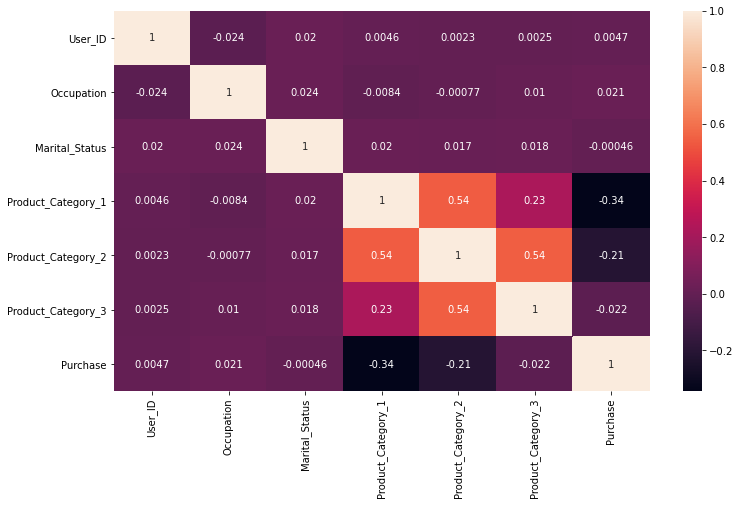

In [10]:
figure,axes = plt.subplots(figsize = (12, 7))
sns.heatmap(df.corr(),annot=True)

# Handling Missing Values

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handle Prod_cat2
Here we will fill missing values by grouping features (Age, Gender, City, Marital Status) for each values missing in product cat2 whill fill by this grouping this will be simillar to real Values

In [12]:
df['Missing_prd_cat2'] = df.groupby(['Gender','Age','City_Category','Marital_Status'],as_index=False)['Product_Category_2'].transform('mean').round()
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Missing_prd_cat2
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,9.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,9.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,9.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,9.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,10.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,10.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,10.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,10.0


In [13]:
df['Product_Category_2'].fillna(df['Missing_prd_cat2'],inplace=True)

In [14]:
df['Missing_prd_cat3'] = df.groupby(['Gender','Age','City_Category','Marital_Status'],as_index=False)['Product_Category_3'].transform('mean').round()
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Missing_prd_cat2,Missing_prd_cat3
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,NaN,8370.0,9.0,11.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,9.0,11.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,NaN,1422.0,9.0,11.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,9.0,11.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,NaN,7969.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,10.0,NaN,NaN,10.0,13.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,10.0,13.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,10.0,13.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,10.0,13.0


In [15]:
df['Product_Category_3'].fillna(df['Missing_prd_cat3'],inplace=True)

In [16]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Missing_prd_cat2,Missing_prd_cat3
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,11.0,8370.0,9.0,11.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,9.0,11.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,11.0,1422.0,9.0,11.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,11.0,1057.0,9.0,11.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,13.0,7969.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,10.0,13.0,NaN,10.0,13.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,13.0,NaN,10.0,13.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,10.0,13.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,13.0,NaN,10.0,13.0


In [17]:
df['Missing_purch'] = df.groupby(['Product_ID','Occupation','Product_Category_1','Product_Category_2','Product_Category_3'],as_index=False)['Purchase'].transform('mean').round()

In [18]:
df['Purchase'].fillna(df['Missing_purch'],inplace=True)

In [19]:
df.drop(['Missing_prd_cat2','Missing_prd_cat3','Missing_purch'],axis=1,inplace=True)

In [20]:
df.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                      13495
dtype: int64

In [21]:
df['Purchase'].fillna(df['Purchase'].mean(),inplace=True)

In [22]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

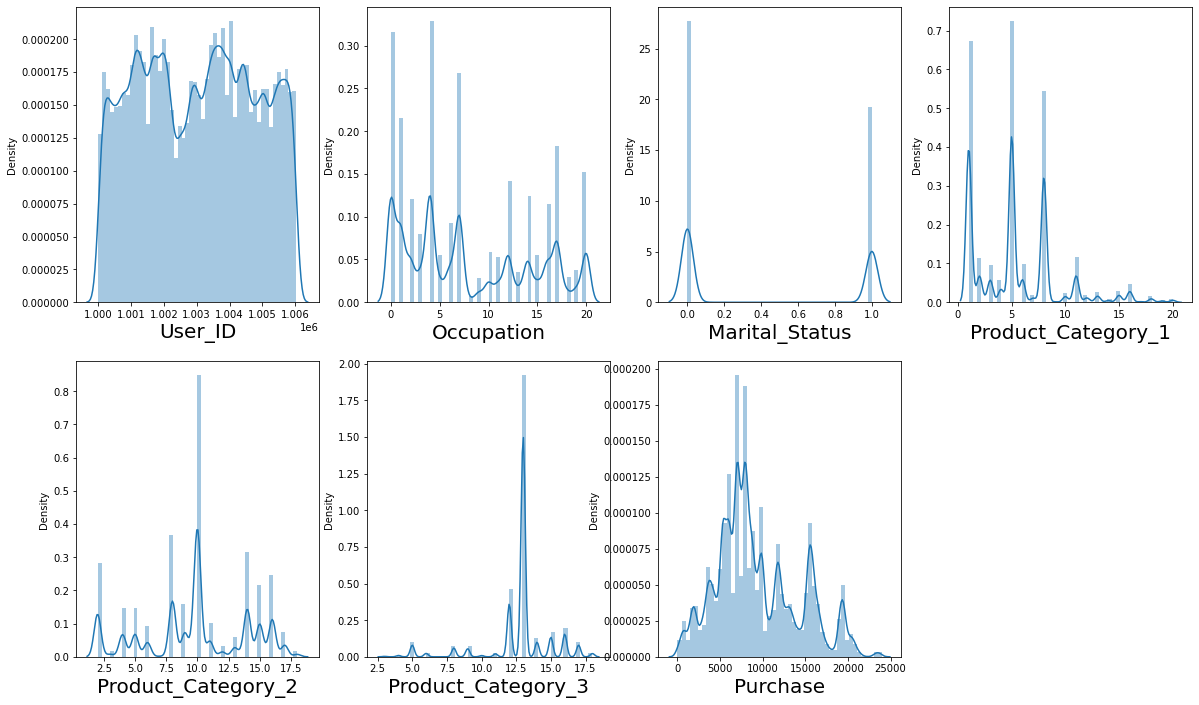

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_fea:
    if plotnumber<=len(df[num_fea]) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Purchase'>

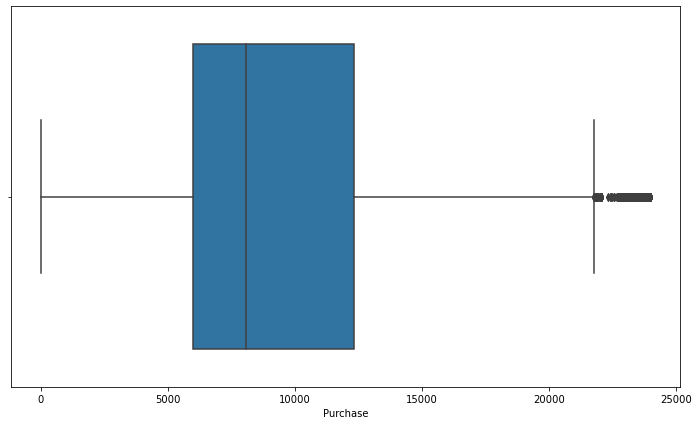

In [24]:
figure,axes = plt.subplots(figsize = (12, 7))
sns.boxplot(df.Purchase)

In [25]:
IQR = df.Purchase.quantile(.75) - df.Purchase.quantile(.25)
lower_bound = df.Purchase.quantile(.25) - (IQR * 1.5)
upper_bound = df.Purchase.quantile(.75) + (IQR * 1.5)
print(lower_bound), print(upper_bound),print(df['Purchase'].mean())

-3452.5
21759.5
9318.41273636825


(None, None, None)

In [26]:
df.Purchase.describe()

count    783667.000000
mean       9318.412736
std        4797.696060
min          12.000000
25%        6002.000000
50%        8081.000000
75%       12305.000000
max       23961.000000
Name: Purchase, dtype: float64

In [27]:
df.loc[df['Purchase']>=21759,'Purchase']=21759

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

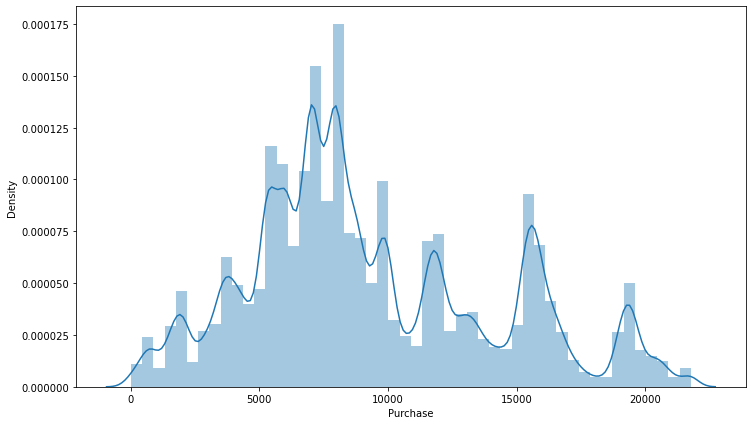

In [28]:
figure,axes = plt.subplots(figsize = (12, 7))
sns.distplot(df.Purchase)

In [29]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [30]:
df.rename({'Product_Category_1':'Cat1','Product_Category_2':'Cat2','Product_Category_3':'Cat3'},axis=1,inplace=True)

In [31]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [32]:
df.Gender = df.Gender.map({'F':1,'M':0})

In [33]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace('+','').astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Cat1                        783667 non-null  int64  
 7   Cat2                        783667 non-null  float64
 8   Cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 62.8+ MB


In [35]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [36]:
age = {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}

In [37]:
df.Age = df.Age.map(age)

In [38]:
city = {'A':1,'B':2,'C':3}
df.City_Category = df.City_Category.map(city) 

In [39]:
df[['Cat2','Cat3']] = df[['Cat2','Cat3']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Cat1                        783667 non-null  int64  
 7   Cat2                        783667 non-null  int32  
 8   Cat3                        783667 non-null  int32  
 9   Purchase                    783667 non-null  float64
dtypes: float64(1), int32(3), int64(6)
memory usage: 56.8 MB


# Viz Gender Vs Purchase By Marital Status

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

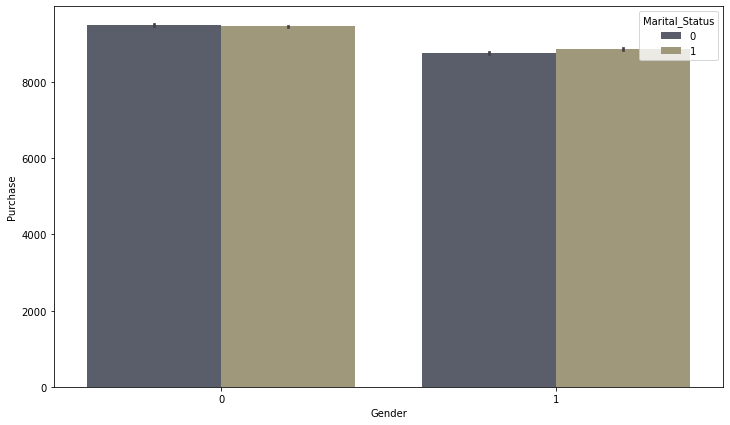

In [40]:
figure,axes = plt.subplots(figsize = (12, 7))
sns.barplot(x='Gender',y='Purchase',data=df,hue='Marital_Status',palette='cividis')

# Viz Age Vs Purchase By Gender

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

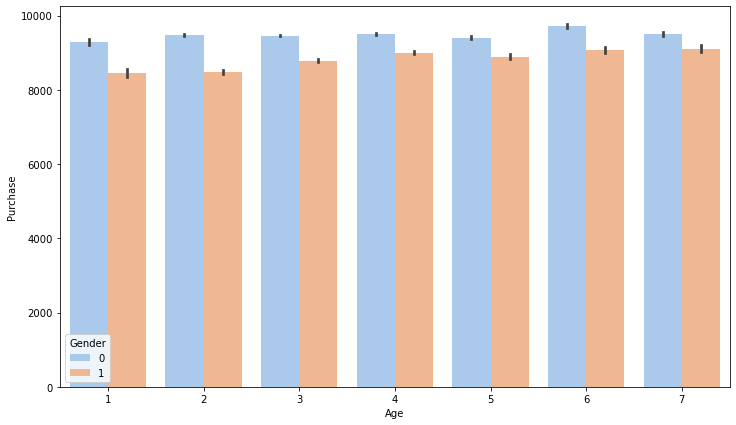

In [41]:
figure,axes = plt.subplots(figsize = (12, 7))
sns.barplot('Age','Purchase',hue='Gender',data=df,palette='pastel')

# Viz Occupation Vs Purchase By Stay in City 

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

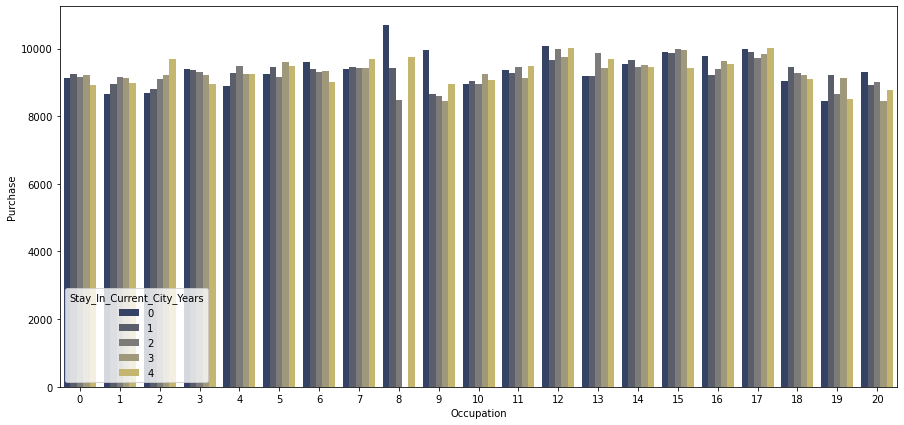

In [42]:
figure,axes = plt.subplots(figsize = (15, 7))
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df,palette='cividis',ci=0)

# Viz Cat1 Vs Purchase bu Marital Status

<AxesSubplot:xlabel='Cat1', ylabel='Purchase'>

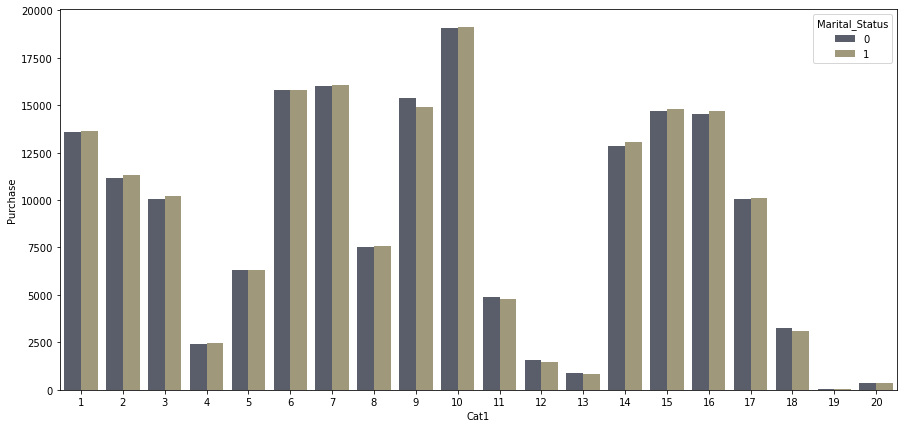

In [43]:
figure,axes = plt.subplots(figsize = (15, 7))
sns.barplot('Cat1','Purchase',hue='Marital_Status',data=df,ci=0,palette='cividis')

# Cat2 Vs Purchase By Marital Status

<AxesSubplot:xlabel='Cat2', ylabel='Purchase'>

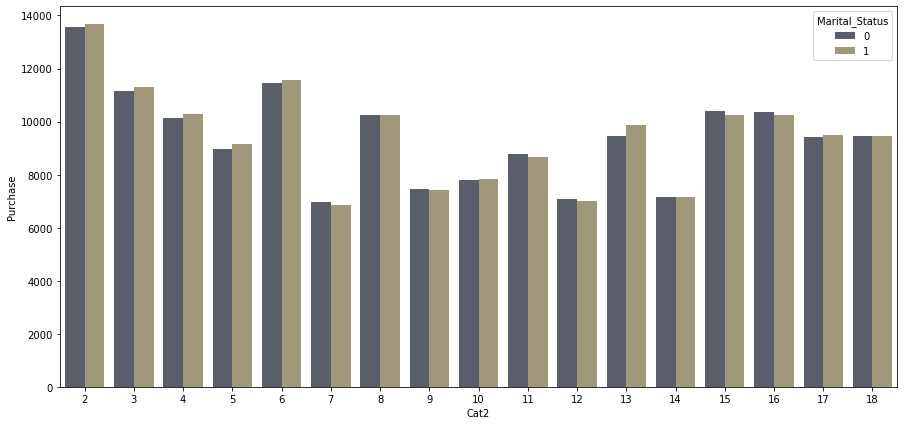

In [44]:
figure,axes = plt.subplots(figsize = (15, 7))
sns.barplot('Cat2','Purchase',hue='Marital_Status',data=df,ci=0,palette='cividis')

# Cat3 Vs Purchase By Marital Status

<AxesSubplot:xlabel='Cat3', ylabel='Purchase'>

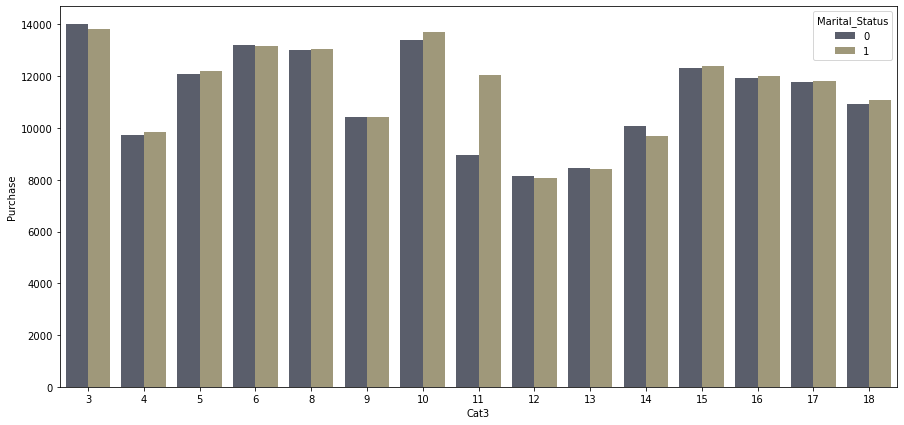

In [45]:
figure,axes = plt.subplots(figsize = (15, 7))
sns.barplot('Cat3','Purchase',hue='Marital_Status',data=df,ci=0,palette='cividis')

# We Will Split Data To 2 data Set Debend On Gender To Compair The Purchasing By Gender 

In [46]:
female = df[df.Gender == 1]

In [47]:
male = df[df.Gender == 0]

In [48]:
female.groupby(['City_Category','Age','Marital_Status'],as_index=False)['Purchase'].mean().max().round()

City_Category        3.0
Age                  7.0
Marital_Status       1.0
Purchase          9806.0
dtype: float64

# Observation
Here We Find The Most City Have A Highest AVG Value Of Purchasing Is C And This Achive By Married Female And Have more than 55yrs

In [49]:
female.groupby(['City_Category','Age','Marital_Status'],as_index=False)['Purchase'].mean().min().round()

City_Category        1.0
Age                  1.0
Marital_Status       0.0
Purchase          7319.0
dtype: float64

# Observation
Here We Find The Most City Have A Lowest AVG Value Of Purchasing Is A And This Achive By Single Female And Age Around 17yrs

In [50]:
male.groupby(['City_Category','Age','Marital_Status'],as_index=False)['Purchase'].mean().max().round()

City_Category         3.0
Age                   7.0
Marital_Status        1.0
Purchase          10587.0
dtype: float64

# Observation
Here We Find The Most City Have A Highest AVG Value Of Purchasing Is C And This Achive By Married Male And Have more than 55yrs

In [51]:
male.groupby(['City_Category','Age','Marital_Status'],as_index=False)['Purchase'].mean().min().round()

City_Category        1.0
Age                  1.0
Marital_Status       0.0
Purchase          8194.0
dtype: float64

# Observation
Here We Find The Most City Have A Lowest AVG Value Of Purchasing Is A And This Achive By Single male And Age Around 17yrs

In [52]:
threshold=0.8
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
correlation(df.iloc[:,:-1],threshold)

set()

In [54]:
X = df.drop('Purchase',axis=1)
y = df['Purchase']

In [55]:
# let's divide our dataset into training set and hold out set by 50%
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 42)

In [56]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.3, random_state= 42)

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [58]:
dt.score(x_test,y_test)

0.5725950145265998

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mae',max_features = 'auto',min_samples_leaf =1,min_samples_split= 4,n_estimators =90)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', min_samples_split=4, n_estimators=90)

In [60]:
rf.score(x_train,y_train)

0.8045921379626129

In [61]:
rf.score(x_test,y_test)

0.6709628068194999

In [62]:
predict_val1 = dt.predict(val_train)
predict_val2 = rf.predict(val_train)
#predict_val2 = rand_clf.predict(val_train)

In [64]:
predict_val = np.column_stack((predict_val1,predict_val2)).round()
predict_val

array([[ 1645.,  4085.],
       [ 4641.,  4580.],
       [ 5287.,  5514.],
       ...,
       [14328., 14453.],
       [ 6235.,  6553.],
       [13142., 13640.]])

In [65]:
predict_test1 = dt.predict(x_test)
predict_test2 = rf.predict(x_test)
#predict_test2 = rand_clf.predict(x_test)

In [67]:
predict_test = np.column_stack((predict_test1,predict_test2)).round()
predict_test

array([[15872., 15588.],
       [12254., 12546.],
       [ 6949.,  6976.],
       ...,
       [12066., 12263.],
       [ 5622.,  6136.],
       [ 7123.,  7381.]])

In [68]:
rf.fit(predict_val,val_test)

RandomForestRegressor(criterion='mae', min_samples_split=4, n_estimators=90)

In [69]:
rf.score(predict_test,y_test)

0.6608201800474621

In [143]:
dt.predict(x_train.loc[1])

array([15200., 11732.])

In [129]:
y_pred = rf.predict(predict_test).round()

In [144]:
y_pred[-1]

7992.0

In [131]:
x_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3
405127,0,2,2,2,3,0,8,9,13
173309,1,4,0,1,2,0,5,10,13
445920,0,2,4,3,3,1,1,15,16
388413,0,3,7,1,1,0,4,9,15
208126,1,2,4,2,1,0,3,4,12
...,...,...,...,...,...,...,...,...,...
406185,0,3,7,1,2,1,16,10,13
226135,0,2,4,2,1,0,5,9,13
198436,1,3,2,2,2,0,8,10,12
198738,1,5,1,2,0,1,5,6,9


In [133]:
import pickle
# saving the model to the local file system
filename = 'Black Friday.pickle'
pickle.dump(rf, open(filename, 'wb'))

In [134]:
loaded_model = pickle.load(open(filename, 'rb'))

In [148]:
a=loaded_model.predict([[15872., 15588.]])
a

array([16131.94444444])

In [147]:
predict_test

array([[15872., 15588.],
       [12254., 12546.],
       [ 6949.,  6976.],
       ...,
       [12066., 12263.],
       [ 5622.,  6136.],
       [ 7123.,  7381.]])

In [145]:
loaded_model.n_features_

2

In [152]:
rf.predict(predict_test)

array([16131.94444444, 12878.8       ,  6576.71666667, ...,
       15275.39444444,  5989.88333333,  7991.60555556])